In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#data for assignment
training_data = np.loadtxt("homework_5_train.txt")
X_train = training_data[:,0:2] #selects columns 1 and 2, which are the x and y coords of the data
Y_train = training_data[:,2] #selections column 3, which is the 0 or 1 label of the data

test_data = np.loadtxt("homework_5_test.txt")
X_test = test_data[:,0:2]
Y_test = test_data[:,2]

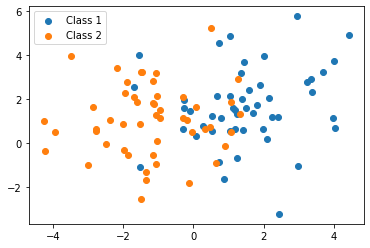

In [8]:
#plotting each class seperately, not important for training the models
X_1 = []
X_2 = []
for row in range(X_train.shape[0]):
    if Y_train[row] == 0:
        X_1.append(X_train[row,:])
    else:
        X_2.append(X_train[row,:])
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)

plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")
plt.legend()
plt.show()

### Problem 1

Using a SVM on the training data set X_train and Y_train, train a classifier. Use the model object function settings I've provided below. Compute and print the training precision and recall. Additionally, compute the _test_ precision and recall.

In [14]:
#insert your code here

svm_model_obj = SVC(gamma='auto', kernel='linear')
svm_model_obj.fit(X_train, Y_train)

Y_hat = svm_model_obj.predict(X_train)

p = sklearn.metrics.precision_score(Y_train, Y_hat)  #order of inputs for these functions is true, prediction
r = sklearn.metrics.recall_score(Y_train, Y_hat)

print("Training precision: ", p)
print("Training recall: ", r)

Y_hat_test = svm_model_obj.predict(X_test)

p_t = sklearn.metrics.precision_score(Y_test, Y_hat_test)
r_t = sklearn.metrics.recall_score(Y_test, Y_hat_test)

print("Training precision: ", p_t)
print("Training recall: ", r_t)

Training precision:  0.7592592592592593
Training recall:  0.82
Training precision:  0.8333333333333334
Training recall:  0.8


### Problem 2

Train a logistic regression classifier on the training data set X_train and Y_train. Compute just the _test_ precision and recall for the logistic regression classifier.

In [15]:
logreg_model_obj = LogisticRegression()
logreg_model_obj.fit(X_train, Y_train)

Y_hat = logreg_model_obj.predict(X_test)

p = sklearn.metrics.precision_score(Y_test, Y_hat) 
r = sklearn.metrics.recall_score(Y_test, Y_hat)

print("Test precision: ", p)
print("Test recall: ", r)

Test precision:  0.851063829787234
Test recall:  0.8


### Problem 3a

Plot the training data and the decision boundaries for both the SVM and logistic regression classifiers. Use sklearn’s model_object.decision_function() method to draw the decision boundaries of each model. A tutorial can be found [here](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html) for plotting an SVM’s decision function. The procedure for drawing the decision boundary is identical for the logistic regression model.

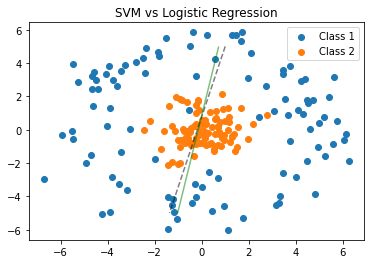

In [16]:
#set up the range of values over which to consider the function
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#get the values of the decision function over the range of values above
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)
Z_log_reg = logreg_model_obj.decision_function(xy).reshape(XX.shape)

#plot the data
plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
c = plt.contour(XX, YY, Z_log_reg, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.legend()
plt.title("SVM vs Logistic Regression", fontsize=12)
plt.show()

### Problem 3b

Plot the test data and the decision boundaries for both the SVM and logistic regression classifiers (plotting the decision boundaries is the same as in part (a)).

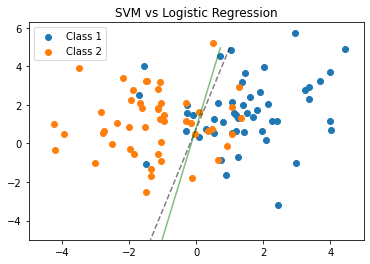

In [17]:
X_1_test = []
X_2_test = []
for row in range(X_test.shape[0]):
    if Y_test[row] == 0:
        X_1_test.append(X_test[row,:])
    else:
        X_2_test.append(X_test[row,:])
X_1_test = np.asarray(X_1_test)
X_2_test = np.asarray(X_2_test)

#get the values of the decision function over the range of values above
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)
Z_log_reg = logreg_model_obj.decision_function(xy).reshape(XX.shape)

#plot the data
plt.scatter(X_1_test[:,0], X_1_test[:,1], label="Class 1")
plt.scatter(X_2_test[:,0], X_2_test[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
c = plt.contour(XX, YY, Z_log_reg, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.legend()
plt.title("SVM vs Logistic Regression", fontsize=12)
plt.show()

### Bonus 1

I've generated a data set that can only be seperated by a circluar boundary. This is the worst case scenario for a model that attempts to sepearte data with a straight line. But recall from our regression assignments: if we know the _type_ of function we want to fit, we can pass the data through a kernel (in this problem we use the [radial basis function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) (RBF)---a very powerful basis). Using the SVM model code you've written above and the data provided here, use the following model function settings to seperate the data and draw the decision boundary.

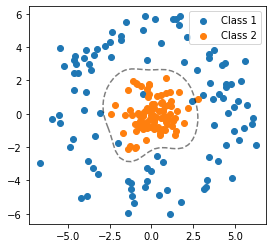

In [18]:
data_bonus = np.loadtxt("homework_5_bonus.txt")
X_b = data_bonus[:,0:2]
Y_b = data_bonus[:,2]

X_1 = []
X_2 = []
for row in range(X_b.shape[0]):
    if Y_b[row] == 0:
        X_1.append(X_b[row,:])
    else:
        X_2.append(X_b[row,:])
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)

plt.gca().set_aspect('equal') 
plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")

svm_model_obj = SVC(gamma='auto', kernel='rbf')  #very important that the kernel setting is 'rbf', other options are "poly" or "linear"
svm_model_obj.fit(X_b, Y_b)

xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)

c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])

plt.legend()
plt.show()